# Project-level Analysis

In [4]:
x=list()
classes=c("character","integer","integer","integer","integer","integer","integer","integer","integer",
          "integer","integer","numeric","numeric","integer","character","integer","integer","integer",
          "integer","numeric","numeric","numeric","numeric")
for(i in 0:2){
    path=paste("../data/projects/sample.P2all.",i,"y",sep="")
    x[[i+1]]=read.table(path,sep=";",colClasses=classes,na.strings=c("null"))
}
names(x)=c("All","1y","2y")

In [5]:
for(i in 1:3) {
    names(x[[i]])=c("p","ncmt","nblob","na","ncore","nmc","nf","cs","nfr","gm","gf","et","lt","ns",
                    "l","nb","cc","bc","bcc","ad","as","acs","ebt")
    x[[i]]$c=x[[i]]$cc>0
    x[[i]]$cr=x[[i]]$cc/x[[i]]$nb
    x[[i]]$br=x[[i]]$bc/x[[i]]$nb
    x[[i]]$bcr=x[[i]]$bcc/x[[i]]$cc
    x[[i]][is.na(x[[i]]$na),"na"]=1
    x[[i]][is.na(x[[i]]$ncore),"ncore"]=1
    x[[i]][is.na(x[[i]]$cs),"cs"]=1
    x[[i]][is.na(x[[i]]$ns),"ns"]=0
    x[[i]][is.na(x[[i]]$gm),"gm"]=0
    x[[i]][is.na(x[[i]]$gf),"gf"]=0
}

In [6]:
sort(table(x[[3]]$l))


       Cob        Ada      Basic       Cuda          F         jl     Erlang 
        10         25         53         71        102        162        206 
       Asp     Groovy       Lisp    Clojure         pl        Lua       Dart 
       347        386        510        641        645        741        983 
     Scala       Rust        Sql        Fml     Kotlin          R         Go 
      1034       1104       1151       1170       1774       2921       4077 
     Swift ObjectiveC        ipy TypeScript        CSS         rb         Cs 
      4159       4260       6240       7873       8015      14789      14937 
         C        php         PY       java         JS   Markdown    Unknown 
     22261      24672      34272      43185      86081     102393     217263 

In [7]:
for(i in 1:3){
    x[[i]][x[[i]]$l=="ipy"&!is.na(x[[i]]$l),"l"]="PY"
}
sort(table(x[[3]]$l))


       Cob        Ada      Basic       Cuda          F         jl     Erlang 
        10         25         53         71        102        162        206 
       Asp     Groovy       Lisp    Clojure         pl        Lua       Dart 
       347        386        510        641        645        741        983 
     Scala       Rust        Sql        Fml     Kotlin          R         Go 
      1034       1104       1151       1170       1774       2921       4077 
     Swift ObjectiveC TypeScript        CSS         rb         Cs          C 
      4159       4260       7873       8015      14789      14937      22261 
       php         PY       java         JS   Markdown    Unknown 
     24672      40512      43185      86081     102393     217263 

In [8]:
tmp=list()
for(i in 1:3) {
    tmp[[i]]=names(table(x[[i]]$l)[table(x[[i]]$l)>1000])
}
tmp2=intersect(intersect(tmp[[1]],tmp[[2]]),tmp[[3]])
tmp2

[1] "C"          "CSS"        "Cs"         "Fml"        "Go"        
 [6] "JS"         "Kotlin"     "Markdown"   "ObjectiveC" "PY"        
[11] "R"          "Rust"       "Scala"      "Sql"        "Swift"     
[16] "TypeScript" "Unknown"    "java"       "php"        "rb"

In [9]:
tmp2=tmp2[! tmp2 %in% c("CSS","Fml","Markdown","Sql","Swift")]
tmp2=c(tmp2,"pl")
tmp2

[1] "C"          "Cs"         "Go"         "JS"         "Kotlin"    
 [6] "ObjectiveC" "PY"         "R"          "Rust"       "Scala"     
[11] "TypeScript" "Unknown"    "java"       "php"        "rb"        
[16] "pl"

In [10]:
for(i in 1:3) {
    x[[i]]$ll=as.factor(ifelse(((x[[i]]$l %in% tmp2) & (x[[i]]$l != "null") & (x[[i]]$l != "Unknown")),
                     as.character(x[[i]]$l), "0ther"))
}
ty=names(table(x[[i]]$ll))
ty

[1] "0ther"      "C"          "Cs"         "Go"         "JS"        
 [6] "Kotlin"     "ObjectiveC" "PY"         "R"          "Rust"      
[11] "Scala"      "TypeScript" "java"       "php"        "pl"        
[16] "rb"

In [11]:
sort(table(x[[3]]$ll))


        pl      Scala       Rust     Kotlin          R         Go ObjectiveC 
       645       1034       1104       1774       2921       4077       4260 
TypeScript         rb         Cs          C        php         PY       java 
      7873      14789      14937      22261      24672      40512      43185 
        JS      0ther 
     86081     353751 

## Variables

**From MongoDB:**  

- p: Project  
- ncmt: NumCommits  
- nblob: NumBlobs  
- na: NumAuthors  
- ncore: NumCore  
- nmc: NumActiveMon  
- nf: NumFiles  
- cs: CommunitySize  
- nfr: NumForks  
- gm: Gender.male  
- gf: Gender.female  
- et: EarliestCommitDate  
- lt: LatestCommitDate  
- ns: Number of stars  

**Calculated in copy timeframe(1y/2y):**

- l: Most common original blob language  
- nb: Original blobs count  
- cc: Copied blobs count  
- bc: Original binary blobs count  
- bcc: Copied binary blobs count  
- ad: Average downstream projects count  
- as: Average original blob size (excluding binary blobs)  
- acs: Average copied blob size (excluding binary blobs)  
- ebt: Earliest original blob time  
- c: Whether project has copied blobs
- cr: Copied to original blobs ratio (cc/nb)
- br: Binary to original blobs ratio (bc/nb)
- bcr: Binary to copied blobs ratio (bcc/cc)

In [476]:
for(i in 1:3) {
    print(names(x)[i])
    print(summary(x[[i]]))
}

[1] "All"
      p                  ncmt             nblob               na          
 Length:921103      Min.   :      1   Min.   :      1   Min.   :    1.00  
 Class :character   1st Qu.:      2   1st Qu.:      6   1st Qu.:    1.00  
 Mode  :character   Median :      4   Median :     24   Median :    1.00  
                    Mean   :     46   Mean   :    396   Mean   :    2.14  
                    3rd Qu.:     12   3rd Qu.:     85   3rd Qu.:    1.00  
                    Max.   :6129261   Max.   :5332329   Max.   :40930.00  
                                                                          
     ncore                nmc                nf                cs          
 Min.   :    1.000   Min.   :  0.000   Min.   :      1   Min.   :    1.00  
 1st Qu.:    1.000   1st Qu.:  1.000   1st Qu.:      4   1st Qu.:    1.00  
 Median :    1.000   Median :  1.000   Median :     17   Median :    1.00  
 Mean   :    1.493   Mean   :  2.209   Mean   :    430   Mean   :    2.04  
 3rd Qu.: 

### 1. What fraction of projects have copied blobs?

In [128]:
for(i in 1:3) {
    print(c(names(x)[i],sum(x[[i]]$c)/dim(x[[i]])[1]))
}

[1] "All"               "0.318064320711147"
[1] "1y"               "0.29248618905248"
[1] "2y"                "0.331250120216197"


### 2. Does propensity to copy vary by language?

In [129]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(c ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   8613   430.7    2192 <2e-16 ***
Residuals   823782 161863     0.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
[1] "2y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   7224   361.2    1720 <2e-16 ***
Residuals   623855 130979     0.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#### 2.1. Which languages are different?

In [447]:
sv=0.005
for(i in 3:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(x[[i]][x[[i]]$ll==l,"c"],x[[i]][x[[i]]$ll!=l,"c"])
        mean=sum(x[[i]][x[[i]]$ll==l,"c"])/dim(x[[i]][x[[i]]$ll==l,])[1]
        print(c(l,mean,sprintf("t: %f %f",test$statistic, test$p.value)))        
    }
}

[1] "2y"
[1] "0ther"                 "0.354514374252657"     "t: 30.431312 0.000000"
[1] "C"                    "0.332554692062351"    "t: 0.420724 0.673960"
[1] "CSS"                   "0.328758577666875"     "t: -0.477873 0.632753"
[1] "Cs"                    "0.370690232309031"     "t: 10.107634 0.000000"
[1] "Fml"                   "0.320512820512821"     "t: -0.787390 0.431213"
[1] "Go"                    "0.313956340446407"     "t: -2.386601 0.017050"
[1] "JS"                    "0.412692696413843"     "t: 52.657866 0.000000"
[1] "Kotlin"               "0.400225479143179"    "t: 5.937019 0.000000"
[1] "Markdown"                "0.116931821511236"      
[3] "t: -212.408878 0.000000"
[1] "ObjectiveC"           "0.400234741784038"    "t: 9.222776 0.000000"
[1] "PY"                    "0.322683239962652"     "t: -3.488192 0.000487"
[1] "R"                     "0.28483396097227"      "t: -5.569183 0.000000"
[1] "Rust"                  "0.315217391304348"     "t: -1.147067 0.251602"
[1

In [448]:
for(i in 3:3) {
    print(names(x)[i])
    glm=glm(c~ll, data=x[[i]], family=binomial)
    print(summary(glm))
}

[1] "2y"

Call:
glm(formula = c ~ ll, family = binomial, data = x[[i]])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3980  -0.9357  -0.8827   1.3304   2.0718  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept)  -0.599254   0.004289 -139.704  < 2e-16 ***
llC          -0.097399   0.014859   -6.555 5.56e-11 ***
llCSS        -0.114551   0.024162   -4.741 2.13e-06 ***
llCs          0.069997   0.017475    4.005 6.19e-05 ***
llFml        -0.152162   0.062793   -2.423  0.01538 *  
llGo         -0.182433   0.034017   -5.363 8.19e-08 ***
llJS          0.246409   0.008144   30.256  < 2e-16 ***
llKotlin      0.194728   0.048649    4.003 6.26e-05 ***
llMarkdown   -1.422557   0.010629 -133.836  < 2e-16 ***
llObjectiveC  0.194767   0.031564    6.171 6.81e-10 ***
llPY         -0.142214   0.012325  -11.539  < 2e-16 ***
llR          -0.321354   0.041219   -7.796 6.38e-15 ***
llRust       -0.176585   0.064921   -2.720  0.00653 ** 
llScala       0

### 3. Does copied blobs ratio differ by language?

In [451]:
for(i in 1:3){
    mean=sum(x[[i]]$cr)/dim(x[[i]])[1]
    print(c(names(x)[i],mean))
}

[1] "All"                "0.0608813527850081"
[1] "1y"                 "0.0525710314357137"
[1] "2y"                "0.059803944369165"


In [131]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(cr ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20    118   5.878   230.9 <2e-16 ***
Residuals   823782  20976   0.025                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
[1] "2y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20     67   3.337   118.2 <2e-16 ***
Residuals   623855  17617   0.028                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#### 3.1. Which languages are different?

In [452]:
sv=0.005
for(i in 3:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(x[[i]][x[[i]]$ll==l,"cr"],x[[i]][x[[i]]$ll!=l,"cr"])
        mean=sum(x[[i]][x[[i]]$ll==l,"cr"])/dim(x[[i]][x[[i]]$ll==l,])[1]
        print(c(l,mean,sprintf("t: %f %f",test$statistic, test$p.value)))
    }
}

[1] "2y"
[1] "0ther"                 "0.0668074657317744"    "t: 25.324852 0.000000"
[1] "C"                     "0.0574663555703928"    "t: -2.162675 0.030576"
[1] "CSS"                   "0.097748145248851"     "t: 15.326840 0.000000"
[1] "Cs"                     "0.0432788160719275"     "t: -14.945456 0.000000"
[1] "Fml"                   "0.0325978521672272"    "t: -8.673058 0.000000"
[1] "Go"                     "0.0407526539301348"     "t: -10.082458 0.000000"
[1] "JS"                   "0.0620186215381198"   "t: 4.376852 0.000012"
[1] "Kotlin"                "0.0336586514689889"    "t: -9.675417 0.000000"
[1] "Markdown"               "0.0473323457508163"     "t: -24.707228 0.000000"
[1] "ObjectiveC"            "0.0565318053931747"    "t: -1.446284 0.148170"
[1] "PY"                     "0.0474306365439212"     "t: -16.315072 0.000000"
[1] "R"                     "0.0585286982359239"    "t: -0.416818 0.676842"
[1] "Rust"                  "0.0305404604237794"    "t: -9.273970 0.00

In [436]:
for(i in 2:3) {
    print(names(x)[i])
    lm=lm(cr~ll, data=x[[i]])
    print(summary(lm))
}

[1] "1y"

Call:
lm(formula = cr ~ ll, data = x[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09212 -0.06023 -0.04449 -0.03555  0.97688 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0602310  0.0002887 208.653  < 2e-16 ***
llC          -0.0126833  0.0010137 -12.512  < 2e-16 ***
llCSS         0.0318918  0.0014159  22.523  < 2e-16 ***
llCs         -0.0219777  0.0011857 -18.535  < 2e-16 ***
llFml        -0.0322901  0.0043768  -7.378 1.61e-13 ***
llGo         -0.0283086  0.0021980 -12.879  < 2e-16 ***
llJS         -0.0010494  0.0005392  -1.946 0.051645 .  
llKotlin     -0.0276177  0.0029787  -9.272  < 2e-16 ***
llMarkdown   -0.0246830  0.0005205 -47.420  < 2e-16 ***
llObjectiveC -0.0130377  0.0023493  -5.550 2.87e-08 ***
llPY         -0.0206444  0.0007829 -26.369  < 2e-16 ***
llR          -0.0121334  0.0026395  -4.597 4.29e-06 ***
llRust       -0.0345624  0.0040350  -8.566  < 2e-16 ***
llScala      -0.0371121  0.0046680  -7.950 1

### 4. Are binary blobs being copied more?

In [89]:
for(i in 2:3) {
    print(names(x)[i])
    print(t.test(x[[i]]$bcr,x[[i]]$br))
}

[1] "1y"

	Welch Two Sample t-test

data:  x[[i]]$bcr and x[[i]]$br
t = 99.91, df = 308790, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07799839 0.08111986
sample estimates:
mean of x mean of y 
0.2142382 0.1346790 

[1] "2y"

	Welch Two Sample t-test

data:  x[[i]]$bcr and x[[i]]$br
t = 84.408, df = 277783, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07109495 0.07447513
sample estimates:
mean of x mean of y 
0.2134628 0.1406778 



#### 4.1. Is this the case for all languages?

In [21]:
test$estimate[1]

mean of x 
0.07589604

In [4]:
sv=0.005
for(i in 3:3){
    print(names(x)[i])
    for(l in ty){
        data=x[[i]][x[[i]]$ll==l,]
        n=dim(data)[1]
        test=t.test(data$br,data$bcr)
        print(c(l,sprintf("br: %f bcr: %f p: %f",
                          test$estimate[1],
                          test$estimate[2],
                          test$p.value)))
    }
}

[1] "2y"
[1] "0ther"                                 
[2] "br: 0.224816 bcr: 0.276575 p: 0.000000"
[1] "C"                                     
[2] "br: 0.110686 bcr: 0.155031 p: 0.000000"
[1] "CSS"                                   
[2] "br: 0.234134 bcr: 0.544244 p: 0.000000"
[1] "Cs"                                    
[2] "br: 0.109747 bcr: 0.211713 p: 0.000000"
[1] "Fml"                                   
[2] "br: 0.045198 bcr: 0.074478 p: 0.017064"
[1] "Go"                                    
[2] "br: 0.037749 bcr: 0.061179 p: 0.000152"
[1] "JS"                                    
[2] "br: 0.054302 bcr: 0.142895 p: 0.000000"
[1] "Kotlin"                                
[2] "br: 0.058776 bcr: 0.124781 p: 0.000000"
[1] "Markdown"                              
[2] "br: 0.075642 bcr: 0.206201 p: 0.000000"
[1] "ObjectiveC"                            
[2] "br: 0.150880 bcr: 0.228701 p: 0.000000"
[1] "PY"                                    
[2] "br: 0.137531 bcr: 0.146907 p: 0.003515"
[

### 4. Does binary blob copy ratio differ by language?

In [418]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(bcr ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   1587   79.33   619.6 <2e-16 ***
Residuals   240930  30847    0.13                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
582852 observations deleted due to missingness
[1] "2y"
                Df Sum Sq Mean Sq F value Pr(>F)    
ll              20   1195   59.75   473.6 <2e-16 ***
Residuals   206638  26073    0.13                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
417217 observations deleted due to missingness


#### 4.1. Which languages are different?

In [422]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){
        t1=x[[i]][x[[i]]$ll==l,"bcr"]
        test=t.test(t1,x[[i]][x[[i]]$ll!=l,"bcr"])
        if(test$p.value<sv){
            mean=sum(t1,na.rm=TRUE)/(dim(x[[i]][x[[i]]$ll==l,])[1]-sum(is.na(t1)))
            print(c(l,mean,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
        
    }
}

[1] "1y"
[1] "C"                "0.15647883200667" "t: -16.313175"   
[1] "CSS"              "0.53439930042172" "t: 44.427040"    
[1] "Cs"               "Not significant!"
[1] "Fml"                "0.0772577394365586" "t: -11.139169"     
[1] "Go"                 "0.0622853212577221" "t: -26.675567"     
[1] "JS"                "0.136183458586808" "t: -58.277499"    
[1] "Kotlin"            "0.128782874556374" "t: -9.936099"     
[1] "Markdown"          "0.230244243600899" "t: 4.763339"      
[1] "ObjectiveC"       "Not significant!"
[1] "Other"             "0.282266697604368" "t: 72.411801"     
[1] "PY"                "0.151788983656584" "t: -22.695511"    
[1] "R"                "Not significant!"
[1] "Rust"              "0.101166936395622" "t: -8.758388"     
[1] "Scala"              "0.0841104720143495" "t: -9.856246"      
[1] "Sql"              "Not significant!"
[1] "Swift"            "Not significant!"
[1] "TypeScript"         "0.0624840032112579" "t: -61.309956"     
[1] "ip

In [437]:
for(i in 2:3) {
    print(names(x)[i])
    lm=lm(bcr~ll, data=x[[i]])
    print(summary(lm))
}

[1] "1y"

Call:
lm(formula = bcr ~ ll, data = x[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53440 -0.23514 -0.13618  0.09067  0.93771 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.282267   0.001153 244.779  < 2e-16 ***
llC          -0.125788   0.004224 -29.778  < 2e-16 ***
llCSS         0.252133   0.005900  42.734  < 2e-16 ***
llCs         -0.079614   0.004642 -17.150  < 2e-16 ***
llFml        -0.205009   0.018588 -11.029  < 2e-16 ***
llGo         -0.219981   0.009458 -23.260  < 2e-16 ***
llJS         -0.146083   0.002022 -72.232  < 2e-16 ***
llKotlin     -0.153484   0.010560 -14.535  < 2e-16 ***
llMarkdown   -0.052022   0.003352 -15.518  < 2e-16 ***
llObjectiveC -0.047129   0.008986  -5.244 1.57e-07 ***
llPY         -0.130478   0.003367 -38.753  < 2e-16 ***
llR          -0.087899   0.012076  -7.279 3.38e-13 ***
llRust       -0.181100   0.017059 -10.616  < 2e-16 ***
llScala      -0.198156   0.018816 -10.531  < 2e-16 ***
ll

### 5. Does binary blob copy ratio differ by language? (Normalized with binary blob ratio)

binary copy ratio / binary blob ratio

In [393]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(bcr/br ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                Df    Sum Sq Mean Sq F value   Pr(>F)    
ll              20    274697   13735   5.464 2.68e-14 ***
Residuals   144310 362720422    2513                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
679472 observations deleted due to missingness
[1] "2y"
                Df    Sum Sq Mean Sq F value Pr(>F)    
ll              20    234371   11719    7.99 <2e-16 ***
Residuals   124779 183004790    1467                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
499076 observations deleted due to missingness


#### 5.1. Which languages are different?

In [417]:
for(i in 2:3){
    tmp=x[[i]]$bcr/x[[i]]$br
    s=sum(tmp,na.rm=TRUE)/(dim(x[[i]])[1]-sum(is.na(tmp)))
    print(c(names(x)[i],s))
}

[1] "1y"               "4.30255631374552"
[1] "2y"               "4.06794982518847"


In [10]:
sv=0.005
for(i in 3:3){
    print(names(x)[i])
    for(l in ty){
        t1=x[[i]][x[[i]]$ll==l,"bcr"]/x[[i]][x[[i]]$ll==l,"br"]
        t2=x[[i]][x[[i]]$ll!=l,"bcr"]/x[[i]][x[[i]]$ll!=l,"br"]
        test=t.test(t1,t2)
        mean=sum(t1,na.rm=TRUE)/(dim(x[[i]][x[[i]]$ll==l,])[1]-sum(is.na(t1)))
        print(c(l,sprintf("mean: %f p: %f",test$estimate[1],test$p.value)))
    }
}

[1] "2y"
[1] "0ther"                      "mean: 3.545104 p: 0.000018"
[1] "C"                          "mean: 3.334187 p: 0.001347"
[1] "CSS"                        "mean: 2.541475 p: 0.000000"
[1] "Cs"                         "mean: 4.920427 p: 0.014968"
[1] "Fml"                        "mean: 3.085897 p: 0.305159"
[1] "Go"                         "mean: 5.739548 p: 0.146827"
[1] "JS"                         "mean: 7.048495 p: 0.000000"
[1] "Kotlin"                     "mean: 5.429070 p: 0.104114"
[1] "Markdown"                   "mean: 2.601752 p: 0.000000"
[1] "ObjectiveC"                 "mean: 2.170565 p: 0.000000"
[1] "PY"                         "mean: 2.215426 p: 0.000000"
[1] "R"                          "mean: 2.658706 p: 0.000007"
[1] "Rust"                       "mean: 6.060592 p: 0.130000"
[1] "Scala"                      "mean: 5.383353 p: 0.282328"
[1] "Sql"                        "mean: 1.719792 p: 0.000000"
[1] "Swift"                      "mean: 2.414920 p: 0.000000"

In [12]:
for(i in 3:3) {
    print(names(x)[i])
    metric=x[[i]]$bcr/x[[i]]$br
    ll=x[[i]]$ll
    lm=lm(metric~ll)
    print(summary(lm))
}

[1] "2y"

Call:
lm(formula = metric ~ ll)

Residuals:
   Min     1Q Median     3Q    Max 
  -7.0   -3.5   -2.7   -1.3 9904.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.54510    0.15898  22.299  < 2e-16 ***
llC          -0.21092    0.56978  -0.370 0.711254    
llCSS        -1.00363    0.85923  -1.168 0.242784    
llCs          1.37532    0.64616   2.128 0.033302 *  
llFml        -0.45921    3.06054  -0.150 0.880732    
llGo          2.19444    1.65720   1.324 0.185442    
llJS          3.50339    0.33955  10.318  < 2e-16 ***
llKotlin      1.88397    1.90494   0.989 0.322670    
llMarkdown   -0.94335    0.55938  -1.686 0.091717 .  
llObjectiveC -1.37454    1.04981  -1.309 0.190427    
llPY         -1.32968    0.48391  -2.748 0.006001 ** 
llR          -0.88640    1.60497  -0.552 0.580756    
llRust        2.51549    3.20647   0.785 0.432746    
llScala       1.83825    3.14141   0.585 0.558436    
llSql        -1.82531    3.11033  -0.587 0.557303

In [6]:
for(i in 3:3) {
    print(names(x)[i])
    lm=lm(bcr/br~ll, data=x[[i]])
    print(summary(lm))
}

[1] "2y"

Call:
lm(formula = bcr/br ~ ll, data = x[[i]])

Residuals:
   Min     1Q Median     3Q    Max 
  -7.0   -3.5   -2.7   -1.3 9904.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.54510    0.15898  22.299  < 2e-16 ***
llC          -0.21092    0.56978  -0.370 0.711254    
llCSS        -1.00363    0.85923  -1.168 0.242784    
llCs          1.37532    0.64616   2.128 0.033302 *  
llFml        -0.45921    3.06054  -0.150 0.880732    
llGo          2.19444    1.65720   1.324 0.185442    
llJS          3.50339    0.33955  10.318  < 2e-16 ***
llKotlin      1.88397    1.90494   0.989 0.322670    
llMarkdown   -0.94335    0.55938  -1.686 0.091717 .  
llObjectiveC -1.37454    1.04981  -1.309 0.190427    
llPY         -1.32968    0.48391  -2.748 0.006001 ** 
llR          -0.88640    1.60497  -0.552 0.580756    
llRust        2.51549    3.20647   0.785 0.432746    
llScala       1.83825    3.14141   0.585 0.558436    
llSql        -1.82531    3.11033  

In [5]:
for(i in 3:3) {
    print(names(x)[i])
    lm=lm(br~ll, data=x[[i]])
    print(summary(lm))
}

[1] "2y"

Call:
lm(formula = br ~ ll, data = x[[i]])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23413 -0.13753 -0.07564  0.02518  0.95712 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   0.2248155  0.0005039  446.122  < 2e-16 ***
llC          -0.1141294  0.0017214  -66.298  < 2e-16 ***
llCSS         0.0093185  0.0027891    3.341 0.000835 ***
llCs         -0.1150688  0.0020717  -55.543  < 2e-16 ***
llFml        -0.1796180  0.0071976  -24.955  < 2e-16 ***
llGo         -0.1870667  0.0038792  -48.224  < 2e-16 ***
llJS         -0.1705136  0.0009770 -174.519  < 2e-16 ***
llKotlin     -0.1660395  0.0058526  -28.370  < 2e-16 ***
llMarkdown   -0.1491739  0.0009182 -162.472  < 2e-16 ***
llObjectiveC -0.0739359  0.0037964  -19.475  < 2e-16 ***
llPY         -0.0872848  0.0014191  -61.507  < 2e-16 ***
llR          -0.1147302  0.0045719  -25.094  < 2e-16 ***
llRust       -0.1893137  0.0074086  -25.553  < 2e-16 ***
llScala      -0.1815751  0.007

**Stars**

In [446]:
sum(x[[3]]$ns>0)/dim(x[[3]])[1]

[1] 0.1320359

In [440]:
test=t.test(x[[3]][x[[3]]$ns>0,"c"],x[[3]][x[[3]]$ns==0,"c"])
test


	Welch Two Sample t-test

data:  x[[3]][x[[3]]$ns > 0, "c"] and x[[3]][x[[3]]$ns == 0, "c"]
t = 95.462, df = 104875, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1730579 0.1803131
sample estimates:
mean of x mean of y 
0.4846068 0.3079213 


In [441]:
test=t.test(x[[3]][x[[3]]$ns>0,"cr"],x[[3]][x[[3]]$ns==0,"cr"])
test


	Welch Two Sample t-test

data:  x[[3]][x[[3]]$ns > 0, "cr"] and x[[3]][x[[3]]$ns == 0, "cr"]
t = 13.567, df = 112927, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.006961384 0.009312506
sample estimates:
 mean of x  mean of y 
0.06686652 0.05872958 


**Contingency**

In [5]:
data3=x[[3]][x[[3]]$ns==0&x[[3]]$ncmt<10,]
data1=x[[3]][x[[3]]$ns>10&x[[3]]$ncmt>100,]
pr1=dim(data1)[1]/dim(x[[3]])[1]
pr3=dim(data3)[1]/dim(x[[3]])[1]
pr2=1-pr1-pr3
print(c(pr1,pr2,pr3))

[1] 0.006124615 0.372208580 0.621666806


In [ ]:
ts=list()
for(i in 2:3){
    ts[[i]]=list()
    for(j in 1:dim(tx[[i]])[1]){
        posix=as.POSIXct(tx[[i]]$t[j], origin="1970-01-01")
        period=substr(posix,1,7)
        c=tx[[i]]$c[j]
        if(is.null(ts[[i]][[period]])){
            ts[[i]][[period]]["total"]=1
            ts[[i]][[period]]["copied"]=c
        }else{
            ts[[i]][[period]]["total"]=ts[[i]][[period]]["total"]+1
            ts[[i]][[period]]["copied"]=ts[[i]][[period]]["copied"]+c
        }
    }
}

**Model**

In [12]:
ok_vars=c("et","lt","ll","ebt","c")
log_vars=c("ncmt","nblob","na","ncore","nmc","nf","cs","nfr","gm","gf","ns",
                    "nb","cc","bc","bcc","ad","as","acs","cr","br","bcr")
lvars=paste("l",log_vars,sep="")
pred_n=c("et","lt","ebt","lncmt","lnblob","lna","lncore","lnmc","lnf","lcs","lnfr","lgm","lgf","lns",
                    "lnb","lbc","las","lbr")

In [13]:
data=x[[3]]
data$lncmt= log(data$ncmt+1)
data$lnblob= log(data$nblob+1)
data$lna= log(data$na+1)
data$lncore= log(data$ncore+1)
data$lnmc= log(data$nmc+1)
data$lnf= log(data$nf+1)
data$lcs= log(data$cs+1)
data$lnfr= log(data$nfr+1)
data$lgm= log(data$gm+1)
data$lgf= log(data$gf+1)
data$lns= log(data$ns+1)
data$lnb= log(data$nb+1)
data$lcc= log(data$cc+1)
data$lbc= log(data$bc+1)
data$lbcc= log(data$bcc+1)
data$lad= log(data$ad+1)
data$las= log(data$as+1)
data$lacs= log(data$acs+1)
data$lcr= log(data$cr+1)
data$lbr= log(data$br+1)
data$lbcr= log(data$bcr+1)

In [14]:
nas=which(is.na(data$et) | is.na(data$lnfr) | is.na(data$las))
data=data[-nas,]

In [15]:
summary(data)

      p                  ncmt             nblob               na          
 Length:608335      Min.   :      1   Min.   :      1   Min.   :    1.00  
 Class :character   1st Qu.:      2   1st Qu.:      7   1st Qu.:    1.00  
 Mode  :character   Median :      5   Median :     28   Median :    1.00  
                    Mean   :     57   Mean   :    437   Mean   :    2.55  
                    3rd Qu.:     14   3rd Qu.:    101   3rd Qu.:    2.00  
                    Max.   :6129261   Max.   :5332329   Max.   :40930.00  
                                                                          
     ncore                nmc                nf                  cs          
 Min.   :    1.000   Min.   :  1.000   Min.   :      1.0   Min.   :    1.00  
 1st Qu.:    1.000   1st Qu.:  1.000   1st Qu.:      5.0   1st Qu.:    1.00  
 Median :    1.000   Median :  1.000   Median :     19.0   Median :    1.00  
 Mean   :    1.656   Mean   :  2.548   Mean   :    450.4   Mean   :    2.54  
 3rd Qu.: 

In [19]:
vars=c("c","ncmt","na","nmc","nfr","et","ns","nb","br","ll",
        "lncmt","lna","lnmc","lnfr","lns","lnb","lbr")
data_c=data[,vars]

In [20]:
summary(data_c)

     c                ncmt               na                nmc         
 Mode :logical   Min.   :      1   Min.   :    1.00   Min.   :  1.000  
 FALSE:403195    1st Qu.:      2   1st Qu.:    1.00   1st Qu.:  1.000  
 TRUE :205140    Median :      5   Median :    1.00   Median :  1.000  
                 Mean   :     57   Mean   :    2.55   Mean   :  2.548  
                 3rd Qu.:     14   3rd Qu.:    2.00   3rd Qu.:  2.000  
                 Max.   :6129261   Max.   :40930.00   Max.   :288.000  
                                                                       
      nfr                 et                  ns                  nb         
 Min.   :    0.00   Min.   :3.158e+08   Min.   :     0.00   Min.   :      1  
 1st Qu.:    0.00   1st Qu.:1.469e+09   1st Qu.:     0.00   1st Qu.:      4  
 Median :    0.00   Median :1.522e+09   Median :     0.00   Median :     15  
 Mean   :    1.57   Mean   :1.505e+09   Mean   :     3.43   Mean   :    163  
 3rd Qu.:    0.00   3rd Qu.:1.558e

In [22]:
for(v in c("ncmt","na","nmc","nfr","et","ns","nb","br")){
    m=mean(data_c[,v])
    quant=quantile(data_c[,v],probs=c(0.05,0.5,0.95))
    print(c(v,quant[1],quant[2],m,quant[3]))
}

                                   5%                50%                    
            "ncmt"                "1"                "5" "57.0530530053342" 
               95% 
              "84" 
                                   5%                50%                    
              "na"                "1"                "1" "2.55386423598839" 
               95% 
               "3" 
                                 5%               50%                   
            "nmc"               "1"               "1" "2.5482998676716" 
              95% 
              "8" 
                                   5%                50%                    
             "nfr"                "0"                "0" "1.56890693450155" 
               95% 
               "1" 
                                   5%                50%                    
              "et"     "1374186230.5"       "1522055200" "1505443609.57574" 
               95% 
    "1583225199.5" 
                                   5%   

In [23]:
pred=c("lnb","lbr","lncmt","lna","lnfr","lns","et","lnmc")
cor=cor(data_c[,pred],method="spearman")
cor

,lnb,lbr,lncmt,lna,lnfr,lns,et,lnmc
lnb,1.00000000,0.46323875,0.67023544,0.3360833,0.21800206,0.22480086,-0.08801195,0.52056218
lbr,0.46323875,1.00000000,0.17547782,0.1160402,0.05666528,0.05413461,-0.02127638,0.14083098
lncmt,0.67023544,0.17547782,1.00000000,0.4477577,0.26553931,0.26482424,-0.05155038,0.67871887
lna,0.33608330,0.11604019,0.44775770,1.0000000,0.31790905,0.21568708,-0.04894280,0.38055069
lnfr,0.21800206,0.05666528,0.26553931,0.3179091,1.00000000,0.48408326,-0.13935295,0.27732004
lns,0.22480086,0.05413461,0.26482424,0.2156871,0.48408326,1.00000000,-0.13319649,0.28330169
et,-0.08801195,-0.02127638,-0.05155038,-0.0489428,-0.13935295,-0.13319649,1.00000000,-0.04779655
lnmc,0.52056218,0.14083098,0.67871887,0.3805507,0.27732004,0.28330169,-0.04779655,1.00000000


In [25]:
library(xtable)
print(xtable(cor))

% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Tue Aug 30 19:54:46 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrrr}
  \hline
 & lnb & lbr & lncmt & lna & lnfr & lns & et & lnmc \\ 
  \hline
lnb & 1.00 & 0.46 & 0.67 & 0.34 & 0.22 & 0.22 & -0.09 & 0.52 \\ 
  lbr & 0.46 & 1.00 & 0.18 & 0.12 & 0.06 & 0.05 & -0.02 & 0.14 \\ 
  lncmt & 0.67 & 0.18 & 1.00 & 0.45 & 0.27 & 0.26 & -0.05 & 0.68 \\ 
  lna & 0.34 & 0.12 & 0.45 & 1.00 & 0.32 & 0.22 & -0.05 & 0.38 \\ 
  lnfr & 0.22 & 0.06 & 0.27 & 0.32 & 1.00 & 0.48 & -0.14 & 0.28 \\ 
  lns & 0.22 & 0.05 & 0.26 & 0.22 & 0.48 & 1.00 & -0.13 & 0.28 \\ 
  et & -0.09 & -0.02 & -0.05 & -0.05 & -0.14 & -0.13 & 1.00 & -0.05 \\ 
  lnmc & 0.52 & 0.14 & 0.68 & 0.38 & 0.28 & 0.28 & -0.05 & 1.00 \\ 
   \hline
\end{tabular}
\end{table}


Standard deviations (1, .., p=8):
[1] 1.8572729 1.1451029 0.9953273 0.9743117 0.7271313 0.6094677 0.4625926
[8] 0.4302956

Rotation (n x k) = (8 x 8):
              PC1         PC2         PC3         PC4         PC5         PC6
lnb    0.37317236  0.48818691 -0.01740779  0.06970588 -0.22620751  0.61313089
lbr    0.03825647  0.51016730 -0.77920970 -0.09695274  0.10568204 -0.30060977
lncmt  0.44409677  0.27747535  0.31459525  0.04226827 -0.08630977  0.03742194
lna    0.40805532 -0.08931047  0.04052188 -0.09312383  0.85595169  0.07973497
lnfr   0.38890571 -0.43194638 -0.28550708 -0.19326587 -0.02934040  0.10238400
lns    0.37209872 -0.42563423 -0.29051382 -0.16931779 -0.40926910  0.02338363
et    -0.12587332  0.17306454  0.20801102 -0.95291943 -0.04214170  0.01823065
lnmc   0.43588823  0.13689569  0.28763841  0.03474109 -0.16559233 -0.71734551
                PC7         PC8
lnb    0.1042589617  0.42342028
lbr   -0.0343081783 -0.13779041
lncmt -0.1238754334 -0.77513470
lna   -0.2263962258

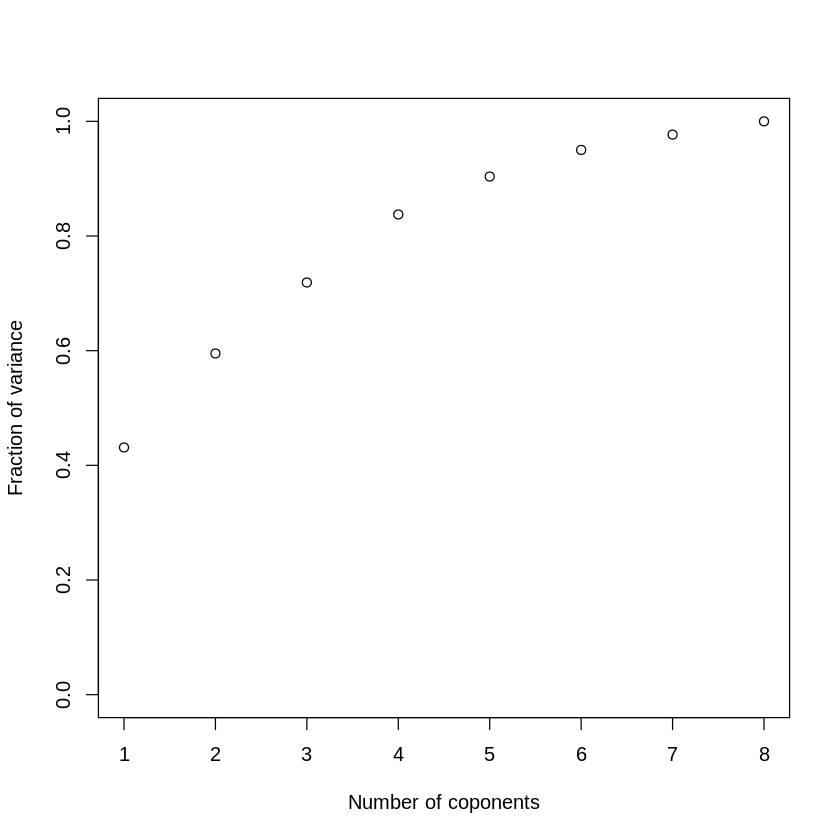

In [28]:
pca <- prcomp(data_c[,pred], retx=F, scale=T)
print(pca)
var <- sum(pca$sdev^2)
cumVar <- cumsum(pca$sdev^2)
plot(1:8,cumVar/var,ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance")

In [29]:
n <- 0
varPer <- 0.9
for (i in c(1:length(pca$sdev))) {
    if(cumVar[i] > var*varPer) {
        n <- i
        break
    }
}
res <- pca$rotation[,1:n]
resAbs <- res
resAbs[res<0] <- -res[res<0]
for (i in 1:n)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

          lnb     lncmt       lna      lnfr       lns      lnmc
PC1 0.3731724 0.4440968 0.4080553 0.3889057 0.3720987 0.4358882
          lnb       lbr       lnfr        lns
PC2 0.4881869 0.5101673 -0.4319464 -0.4256342
           lbr     lncmt
PC3 -0.7792097 0.3145953
            et
PC4 -0.9529194
          lna        lns
PC5 0.8559517 -0.4092691


In [34]:
vnam <- names(data_c[,pred])
len <- dim(data_c[,pred])[2]
res <- vector(mode="list", length=len)
for (i in 1:len){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-i],collapse="+"),sep="~"));
  res[[i]] <- lm(fmla,data=data_c[,pred]);
}
for (i in 1:len) {
    print(c(vnam[i],"-> ",summary(res[[i]])$adj.r.squared),quote=FALSE)
}

[1] lnb               ->                0.575453465776857
[1] lbr               ->                0.162570001775225
[1] lncmt             ->                0.718487932608517
[1] lna               ->                0.457152977887151
[1] lnfr              ->                0.648255760991895
[1] lns               ->                0.597171943795622
[1] et                 ->                 0.0348353586339474
[1] lnmc              ->                0.594674652982857


In [35]:
glm=glm(c~lnb+lbr+lncmt+lna+lnfr+lns+et+lnmc+ll,data=data_c,family=binomial)
summary(glm)


Call:
glm(formula = c ~ lnb + lbr + lncmt + lna + lnfr + lns + et + 
    lnmc + ll, family = binomial, data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5969  -0.7898  -0.5129   0.9173   2.3502  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.209e+00  7.156e-02 -30.869  < 2e-16 ***
lnb           6.127e-01  3.112e-03 196.846  < 2e-16 ***
lbr           7.481e-01  1.962e-02  38.136  < 2e-16 ***
lncmt        -1.778e-02  4.561e-03  -3.899 9.65e-05 ***
lna           1.042e-01  1.176e-02   8.856  < 2e-16 ***
lnfr          3.086e-01  1.110e-02  27.792  < 2e-16 ***
lns           5.835e-02  7.882e-03   7.403 1.33e-13 ***
et           -4.466e-10  4.658e-11  -9.588  < 2e-16 ***
lnmc          8.860e-02  8.275e-03  10.707  < 2e-16 ***
llC          -3.272e-01  1.671e-02 -19.582  < 2e-16 ***
llCs         -3.101e-01  1.936e-02 -16.019  < 2e-16 ***
llGo         -2.926e-01  3.796e-02  -7.708 1.28e-14 ***
llJS          2.036e-01 

In [36]:
print(xtable(summary(glm)$coef))

% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Tue Aug 30 20:57:42 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & z value & Pr($>$$|$z$|$) \\ 
  \hline
(Intercept) & -2.21 & 0.07 & -30.87 & 0.00 \\ 
  lnb & 0.61 & 0.00 & 196.85 & 0.00 \\ 
  lbr & 0.75 & 0.02 & 38.14 & 0.00 \\ 
  lncmt & -0.02 & 0.00 & -3.90 & 0.00 \\ 
  lna & 0.10 & 0.01 & 8.86 & 0.00 \\ 
  lnfr & 0.31 & 0.01 & 27.79 & 0.00 \\ 
  lns & 0.06 & 0.01 & 7.40 & 0.00 \\ 
  et & -0.00 & 0.00 & -9.59 & 0.00 \\ 
  lnmc & 0.09 & 0.01 & 10.71 & 0.00 \\ 
  llC & -0.33 & 0.02 & -19.58 & 0.00 \\ 
  llCs & -0.31 & 0.02 & -16.02 & 0.00 \\ 
  llGo & -0.29 & 0.04 & -7.71 & 0.00 \\ 
  llJS & 0.20 & 0.01 & 22.18 & 0.00 \\ 
  llKotlin & -0.24 & 0.05 & -4.51 & 0.00 \\ 
  llObjectiveC & -0.13 & 0.03 & -3.66 & 0.00 \\ 
  llPY & -0.19 & 0.01 & -14.84 & 0.00 \\ 
  llR & -0.27 & 0.05 & -5.90 & 0.00 \\ 
  llRust & -0.48 & 0.07 & -6.63 & 0.00 \\ 
  llScala & -0.27 & 0.07 & -3.76 & 0.00 \\

In [37]:
print(xtable(anova(glm)))

% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Wed Aug 31 08:35:21 2022
\begin{table}[ht]
\centering
\begin{tabular}{lrrrr}
  \hline
 & Df & Deviance & Resid. Df & Resid. Dev \\ 
  \hline
NULL &  &  & 608334 & 777660.48 \\ 
  lnb & 1 & 131219.53 & 608333 & 646440.95 \\ 
  lbr & 1 & 662.94 & 608332 & 645778.01 \\ 
  lncmt & 1 & 267.93 & 608331 & 645510.08 \\ 
  lna & 1 & 684.14 & 608330 & 644825.94 \\ 
  lnfr & 1 & 2064.32 & 608329 & 642761.62 \\ 
  lns & 1 & 60.93 & 608328 & 642700.68 \\ 
  et & 1 & 113.71 & 608327 & 642586.97 \\ 
  lnmc & 1 & 148.37 & 608326 & 642438.60 \\ 
  ll & 15 & 5175.56 & 608311 & 637263.04 \\ 
   \hline
\end{tabular}
\end{table}


In [38]:
for(l in ty){ 
        mean=sum(data_c[data_c$ll==l,"c"])/dim(data_c[data_c$ll==l,])[1]
        print(c(l,mean))        
    }

[1] "0ther"             "0.293584490679154"
[1] "C"                 "0.332509659448288"
[1] "Cs"                "0.370563814115441"
[1] "Go"                "0.313956340446407"
[1] "JS"                "0.412688084587231"
[1] "Kotlin"            "0.400225479143179"
[1] "ObjectiveC"        "0.400234741784038"
[1] "PY"                "0.305286028195442"
[1] "R"                 "0.285029119561494"
[1] "Rust"              "0.315217391304348"
[1] "Scala"            "0.36073500967118"
[1] "TypeScript"        "0.623554821496633"
[1] "java"              "0.362179190215881"
[1] "php"               "0.464414615353421"
[1] "pl"               "0.29922480620155"
[1] "rb"                "0.512173677803327"


In [40]:
    for(l in ty){ 
        mean=sum(data[data$ll==l,"cr"])/dim(data[data_c$ll==l,])[1]
        print(c(l,mean))
    }

[1] "0ther"             "0.062273516221499"
[1] "C"                  "0.0574443159438311"
[1] "Cs"                 "0.0432450279138664"
[1] "Go"                 "0.0407526539301348"
[1] "JS"                 "0.0620137548580711"
[1] "Kotlin"             "0.0336586514689889"
[1] "ObjectiveC"         "0.0565318053931747"
[1] "PY"                 "0.0481316380024039"
[1] "R"                  "0.0585688001189221"
[1] "Rust"               "0.0305404604237794"
[1] "Scala"             "0.031235869492959"
[1] "TypeScript"         "0.0707412376779077"
[1] "java"               "0.0522299698785455"
[1] "php"               "0.076801303787034"
[1] "pl"                 "0.0933754424465341"
[1] "rb"                 "0.0608695961710174"


In [42]:
metric=data$bcr/data$br
ll=data$ll
lm=lm(metric~ll)
summary(lm)


Call:
lm(formula = metric ~ ll)

Residuals:
   Min     1Q Median     3Q    Max 
  -7.0   -3.5   -3.0   -1.4 9904.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.47088    0.15093  22.996  < 2e-16 ***
llC          -0.13670    0.57077  -0.239 0.810722    
llCs          1.44954    0.64790   2.237 0.025270 *  
llGo          2.26866    1.66635   1.361 0.173372    
llJS          3.57815    0.33751  10.602  < 2e-16 ***
llKotlin      1.95819    1.91570   1.022 0.306698    
llObjectiveC -1.30032    1.05481  -1.233 0.217673    
llPY         -1.27503    0.45972  -2.773 0.005547 ** 
llR          -0.81218    1.61379  -0.503 0.614773    
llRust        2.58971    3.22538   0.803 0.422024    
llScala       1.91247    3.15991   0.605 0.545028    
llTypeScript  1.70189    0.91858   1.853 0.063922 .  
lljava        1.44407    0.41467   3.482 0.000497 ***
llphp         1.01937    0.48435   2.105 0.035326 *  
llpl         -0.14945    4.85637  -0.031 0.975449    
llrb

In [44]:
for(l in ty){
        t1=data[data$ll==l,"bcr"]/data[data$ll==l,"br"]
        mean=sum(t1,na.rm=TRUE)/(dim(data[data$ll==l,])[1]-sum(is.na(t1)))
        print(c(l,mean))
    }

[1] "0ther"            "3.47088311117382"
[1] "C"                "3.33418671850587"
[1] "Cs"               "4.92042678664937"
[1] "Go"               "5.73954755432749"
[1] "JS"               "7.04903306493861"
[1] "Kotlin"          "5.4290704476513"
[1] "ObjectiveC"       "2.17056523666383"
[1] "PY"               "2.19585272738518"
[1] "R"                "2.65870643007743"
[1] "Rust"            "6.0605920756264"
[1] "Scala"            "5.38335303372322"
[1] "TypeScript"       "5.17277231225754"
[1] "java"             "4.91495548137661"
[1] "php"              "4.49025383224273"
[1] "pl"              "3.3214292719832"
[1] "rb"               "3.51264291818964"


In [46]:
sum(metric,na.rm=TRUE)/(dim(data)[1]-sum(is.na(metric)))

[1] 4.104708